In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [42]:
data=pd.read_excel("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Forecasting\\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [43]:
data['Month']=pd.to_datetime(data.Month,format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

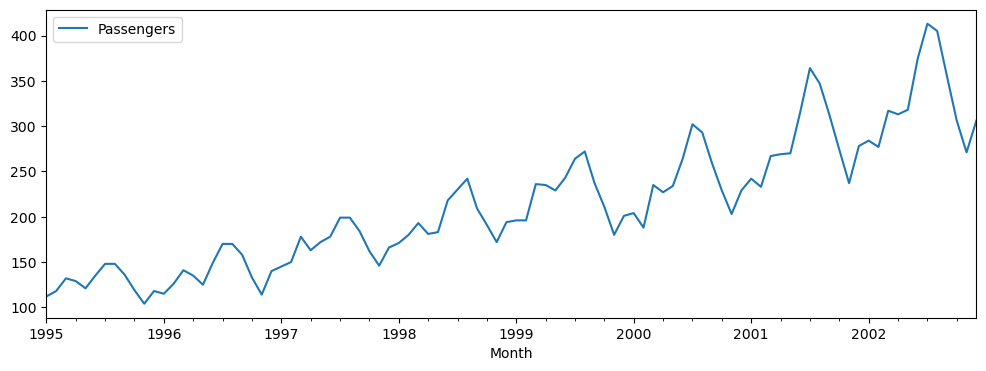

In [44]:
data.plot(figsize=(12,4))

In [45]:
data.isnull().sum()

Passengers    0
dtype: int64

In [46]:
data.reset_index(inplace=True)

In [47]:
data['t']=1

In [48]:
for i,row in data.iterrows():
    data['t'].iloc[i] = i+1

In [49]:
data.head()

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [50]:
data['Log_passengers']=np.log(data.Passengers)

In [51]:
data['t_sq']=(data.t)**2

In [52]:
data['month']=data.Month.dt.strftime("%b")
data['year']=data.Month.dt.strftime("%Y")

In [53]:
month=pd.get_dummies(data.month)
months = month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
df=pd.concat([data,months],axis=1)
df

,Month,Passengers,t,Log_passengers,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,4.718499,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4.770685,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,4.882802,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,4.859812,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,4.795791,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,5.872118,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,5.723585,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,5.602119,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='month', ylabel='year'>

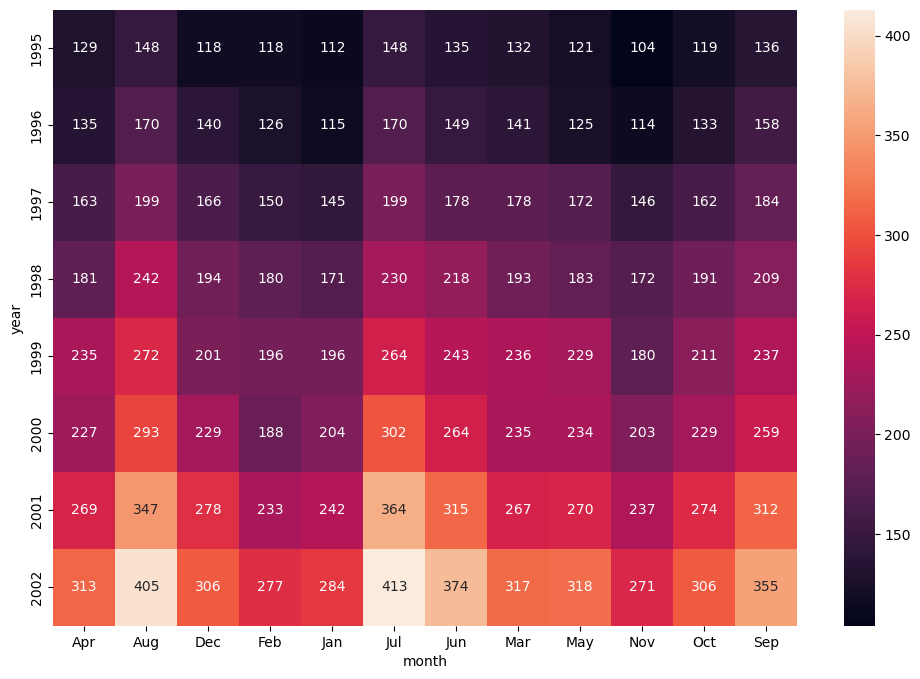

In [55]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

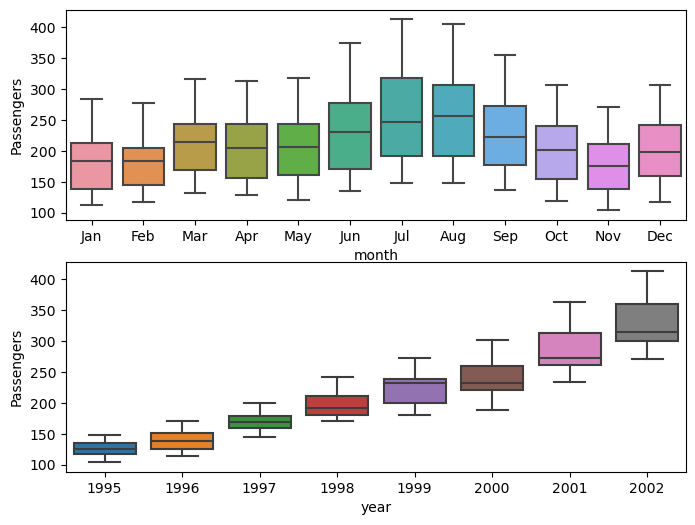

In [56]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

### from above boxplots we can see that no of passengers in month of jult,august are increased compared to other month
### rate of passengers using the airlines are increased as year passed

<AxesSubplot:xlabel='month', ylabel='Passengers'>

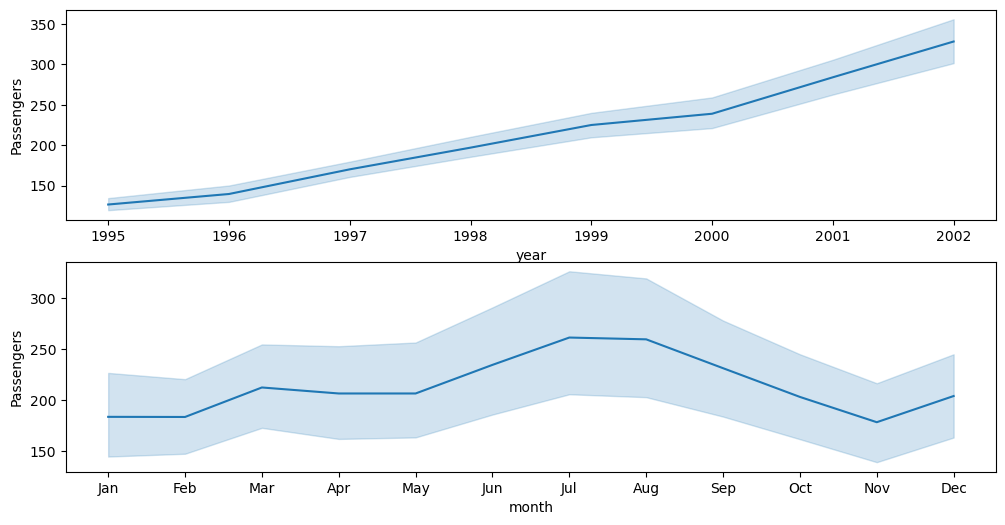

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.lineplot(x="year",y="Passengers",data=df)
plt.subplot(212)
sns.lineplot(x="month",y="Passengers",data=df)

In [58]:
# splitting the data
Train=df.head(72)
Test=df.tail(24)
Test

,Month,Passengers,t,Log_passengers,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
72,2001-01-01,242,73,5.488938,5329,Jan,2001,1,0,0,0,0,0,0,0,0,0,0,0
73,2001-02-01,233,74,5.451038,5476,Feb,2001,0,1,0,0,0,0,0,0,0,0,0,0
74,2001-03-01,267,75,5.587249,5625,Mar,2001,0,0,1,0,0,0,0,0,0,0,0,0
75,2001-04-01,269,76,5.594711,5776,Apr,2001,0,0,0,1,0,0,0,0,0,0,0,0
76,2001-05-01,270,77,5.598422,5929,May,2001,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,5.752573,6084,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,5.897154,6241,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,5.849325,6400,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,5.743003,6561,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,5.613128,6724,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0


# Model based methods

In [59]:
import statsmodels.formula.api as smf

# Linear model

In [61]:
linear_model=smf.ols('Passengers~t',data=Train).fit()
predict_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predict_linear))**2))
rmse_linear

51.6677929956463

# exponential model

In [63]:
Exp_model=smf.ols('Log_passengers~t',data=Train).fit()
predict_exp=pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predict_exp)))**2))
rmse_Exp

42.55232894600458

# Quadratic

In [65]:
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predict_Quad))**2))
rmse_Quad

51.99073640155462

# Additive seasonality 

In [66]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.26451565320346

# Additive Seasonality Quadratic

In [67]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.2416084859568

# Multiplicative Seasonality

In [68]:
Mul_sea = smf.ols('Log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263468

# Multiplicative Additive Seasonality

In [69]:
Mul_Add_sea = smf.ols('Log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.714670246780758

In [70]:
#Compare the results 

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.714670
4,rmse_add_sea_quad,35.241608
1,rmse_Exp,42.552329
0,rmse_linear,51.667793
2,rmse_Quad,51.990736
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,132.187628


# #Multiplicative Additive Seasonality has low rmse values,so we bulid final modal on that.

In [72]:
final_model = smf.ols('Log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
predict = pd.Series(final_model.predict(Test))


In [73]:
pred_new  = pd.Series(final_model.predict(Test))
pred_new

72    5.502800
73    5.527309
74    5.673032
75    5.630101
76    5.618145
77    5.730542
78    5.831585
79    5.839994
80    5.732691
81    5.605610
82    5.476099
83    5.611323
84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [74]:
Test["forecasted_Passengers"] = pd.Series(pred_new)

In [75]:
new_var = pd.concat([Train,Test])
type(new_var)

pandas.core.frame.DataFrame

<AxesSubplot:>

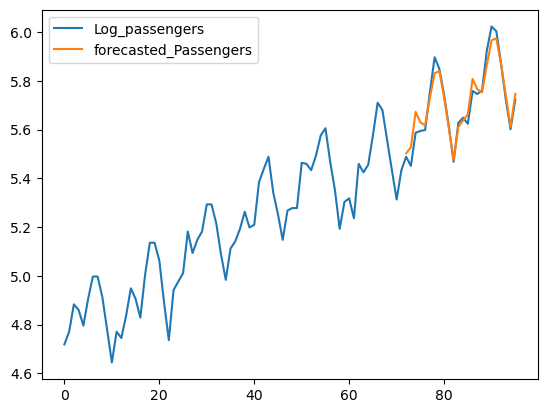

In [76]:
new_var[['Log_passengers','forecasted_Passengers']].reset_index(drop=True).plot()

In [141]:
y_mul_add = Test.copy()
Mul_Add_sea = smf.ols('Log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
y_mul_add['mul_add_sea'] = np.exp(Mul_Add_sea.predict(Test))
y_mul_add['mul_sea_forecast']=np.exp(Mul_sea.predict(Test))
y_mul_add['linear_predict']=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
y_mul_add['Quadratic']=pd.Series(Quad.predict(Test[["t","t_sq"]]))
y_mul_add['Additive_sea']=add_sea.predict(Test)

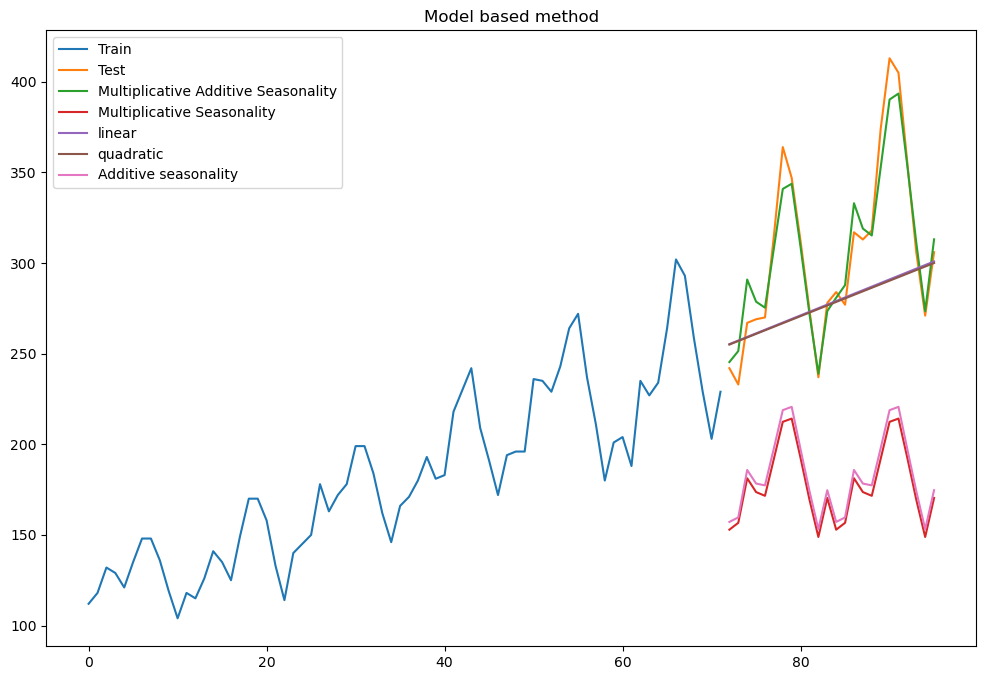

In [143]:
plt.figure(figsize = (12,8))
plt.plot(Train['Passengers'], label = 'Train')
plt.plot(Test['Passengers'], label = 'Test')
plt.plot(y_mul_add['mul_add_sea'], label ='Multiplicative Additive Seasonality')
plt.plot(y_mul_add['mul_sea_forecast'], label ='Multiplicative Seasonality')
plt.plot(y_mul_add['linear_predict'], label ='linear')
#plt.plot(y_mul_add['exponential'], label ='exponential')
plt.plot(y_mul_add['Quadratic'], label ='quadratic')
plt.plot(y_mul_add['Additive_sea'], label ='Additive seasonality')
plt.legend(loc = 'best')
plt.title('Model based method')
plt.show()

## As from the rmse and from above line plot we can see that Multiplicative Additive Seasonality has low rmse,
## model is predicting values close the test values

In [145]:
y_mul_add.head()

,Month,Passengers,t,Log_passengers,t_sq,month,year,Jan,Feb,Mar,...,Oct,Nov,Dec,forecasted_Passengers,mul_add_sea,mul_sea_forecast,linear_predict,exponential,Quadratic,Additive_sea
72,2001-01-01,242,73,5.488938,5329,Jan,2001,1,0,0,...,0,0,0,5.502800,245.378110,152.883648,255.281299,42.552329,255.033451,157.166667
73,2001-02-01,233,74,5.451038,5476,Feb,2001,0,1,0,...,0,0,0,5.527309,251.466317,156.676925,257.264272,42.552329,256.996053,159.666667
74,2001-03-01,267,75,5.587249,5625,Mar,2001,0,0,1,...,0,0,0,5.673032,290.915247,181.255713,259.247245,42.552329,258.958104,185.833333
75,2001-04-01,269,76,5.594711,5776,Apr,2001,0,0,0,...,0,0,0,5.630101,278.690401,173.638981,261.230218,42.552329,260.919605,178.333333
76,2001-05-01,270,77,5.598422,5929,May,2001,0,0,0,...,0,0,0,5.618145,275.377947,171.575146,263.213192,42.552329,262.880556,177.333333


# ARIMA

In [77]:
df=pd.read_excel("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Forecasting\\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

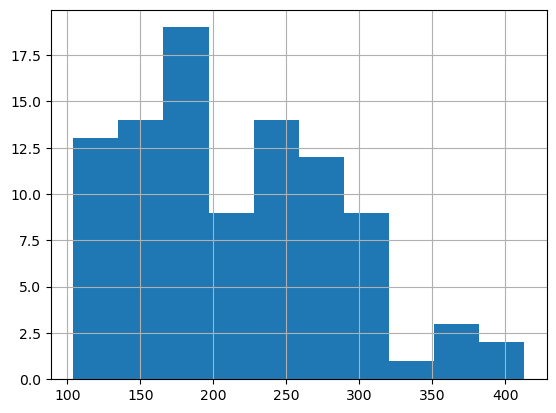

In [78]:
df['Passengers'].hist()

# log Transformations

In [80]:
df_log=data.iloc[:,:2]
df_log['Passengers']=np.log(df_log.Passengers)
df_log

,Month,Passengers
0,1995-01-01,4.718499
1,1995-02-01,4.770685
2,1995-03-01,4.882802
3,1995-04-01,4.859812
4,1995-05-01,4.795791
...,...,...
91,2002-08-01,6.003887
92,2002-09-01,5.872118
93,2002-10-01,5.723585
94,2002-11-01,5.602119


In [81]:
df_log['Month']=pd.to_datetime(df_log.Month,format='%Y-%m')
df = df_log.set_index('Month')
df.head()

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


<AxesSubplot:>

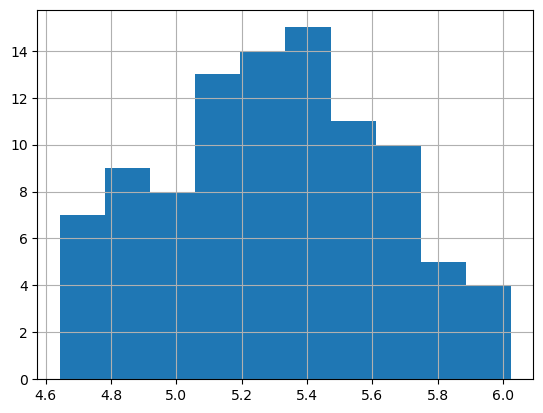

In [82]:
df_log['Passengers'].hist()

In [83]:
## VISUALIZE THE DATA

<AxesSubplot:xlabel='Month'>

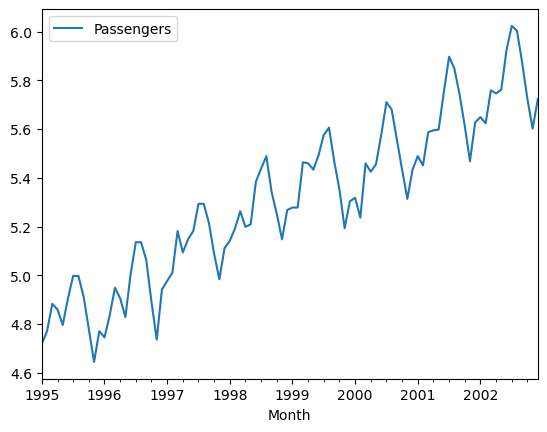

In [84]:
df.plot()

# Need to check the data either it is stationary or not

# determining the differencing order 'd'.

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

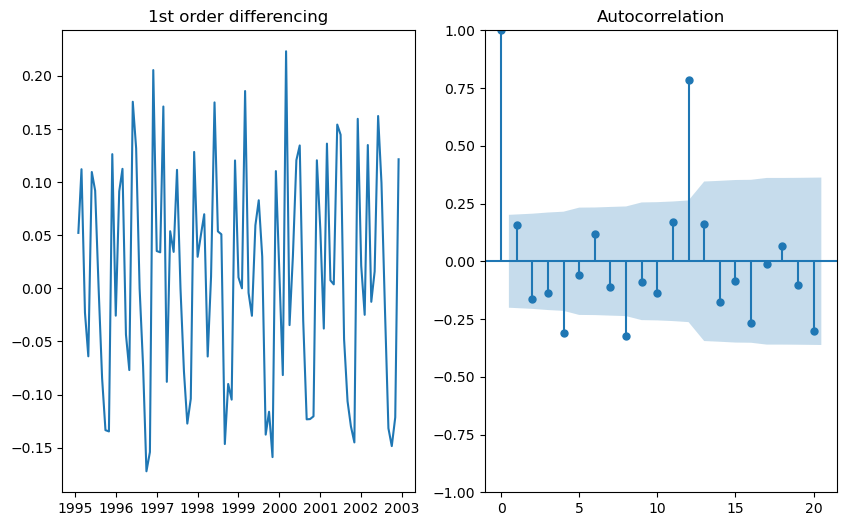

In [86]:
plot=plt.figure(figsize=(10,6))
ax1=plot.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.Passengers.diff())
ax2=plot.add_subplot(122)
plot_acf(df.Passengers.diff().dropna(),ax=ax2)
plt.show()

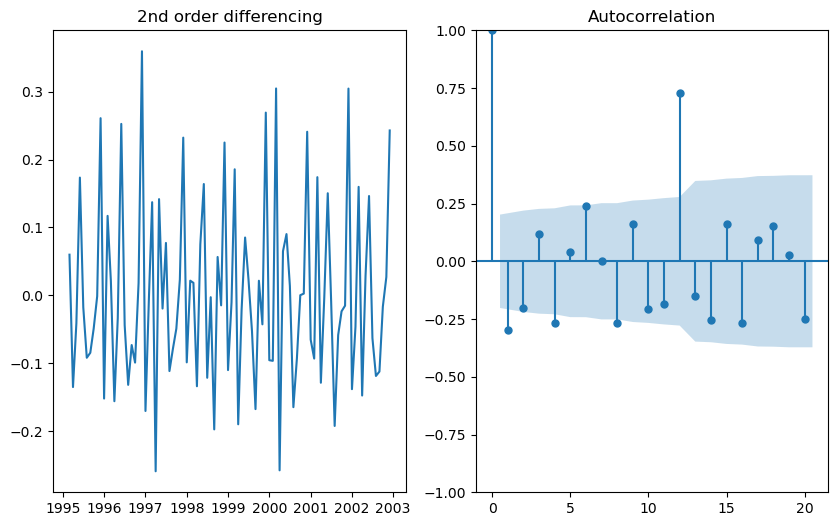

In [87]:
plot=plt.figure(figsize=(10,6))
ax11=plot.add_subplot(121)
ax11.set_title('2nd order differencing')
ax11.plot(df.Passengers.diff().diff())
ax22=plot.add_subplot(122)
plot_acf(df.Passengers.diff().diff().dropna(),ax=ax22)
plt.show()

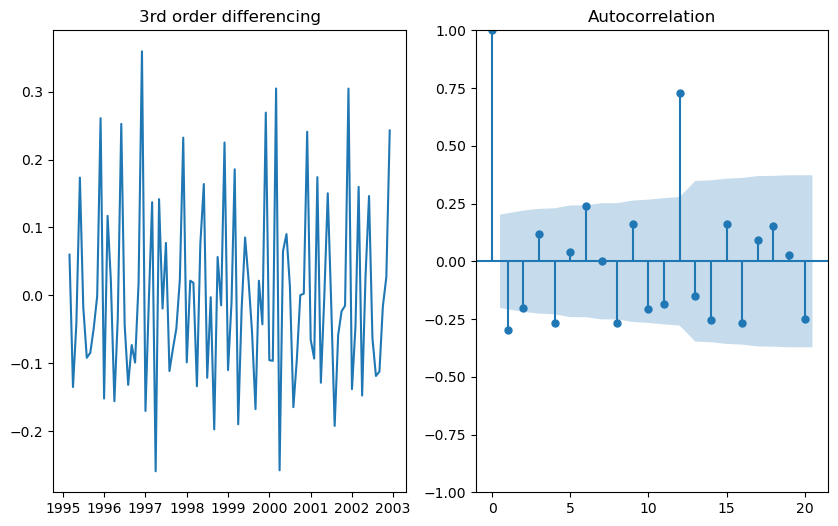

In [88]:
plot=plt.figure(figsize=(10,6))
ax1=plot.add_subplot(121)
ax1.set_title('3rd order differencing')
ax1.plot(df.Passengers.diff().diff())
ax2=plot.add_subplot(122)
plot_acf(df.Passengers.diff().diff().dropna(),ax=ax2)
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# adfuller test

In [90]:
result=adfuller(df.Passengers.dropna())
print('p=value',result[1])

result=adfuller(df.Passengers.diff().dropna())
print('p=value',result[1])

result=adfuller(df.Passengers.diff().diff().dropna())
print('p=value',result[1])

result=adfuller(df.Passengers.diff().diff().diff().dropna())
print('p=value',result[1])

p=value 0.8406945968114743
p=value 0.07922469056630133
p=value 1.3508586922710828e-20
p=value 1.4054416965931227e-13


### As we see above, after the 2nd order differencing, the p-value drops beyond the acceptable threshold. 
###  we reject the null hypothesis for 2nd order differencing
### Thus, we can consider the order of differencing (“d”) as 2.

# ACF AND PACF PLOTS FOR @ND ORDER DIFFERNCINg

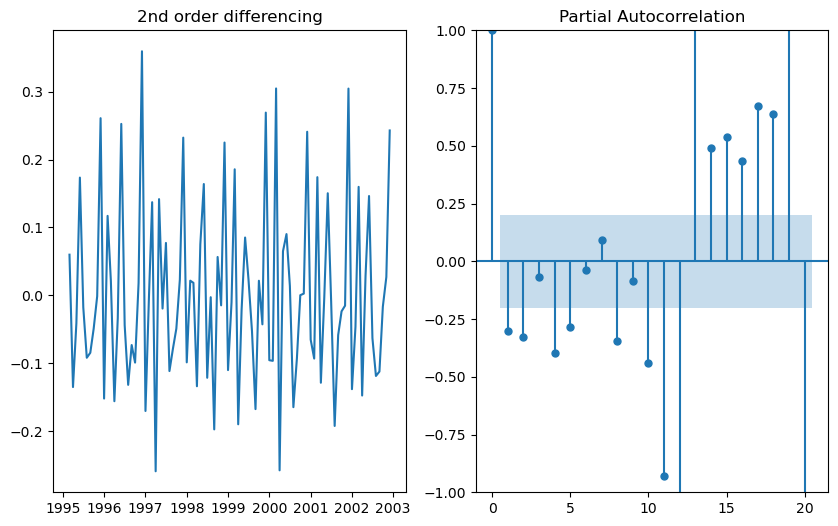

In [91]:
plot=plt.figure(figsize=(10,6))
ax11=plot.add_subplot(121)
ax11.set_title('2nd order differencing')
ax11.plot(df.Passengers.diff().diff())
ax22=plot.add_subplot(122)
plot_pacf(df.Passengers.diff().diff().dropna(),ax=ax22)
plt.show()

### we determine “p” based on the most significant lag in the partial autocorrelation plot
### By above plot we see that lag1&lag2 is more significant,p=2

In [92]:
df_log['Month']=pd.to_datetime(df_log.Month,format='%Y-%m')
df = df_log.set_index('Month')
df.head()

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


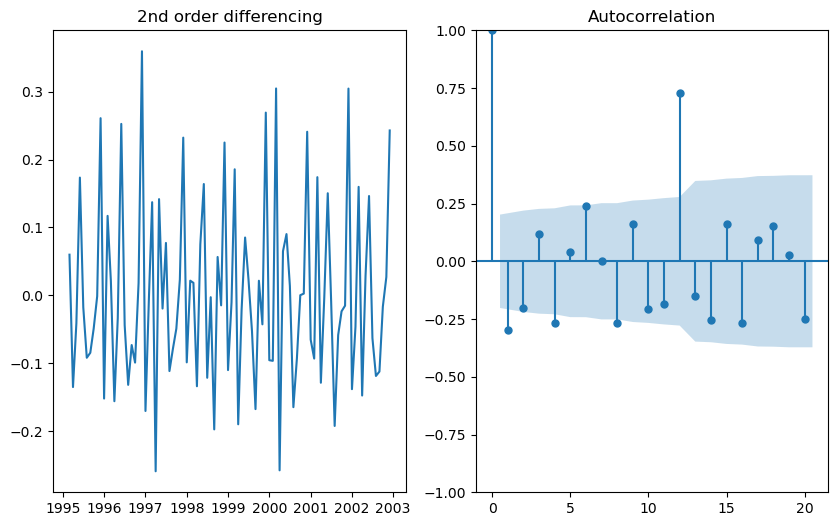

In [93]:
plot=plt.figure(figsize=(10,6))
ax11=plot.add_subplot(121)
ax11.set_title('2nd order differencing')
ax11.plot(df.Passengers.diff().diff())
ax22=plot.add_subplot(122)
plot_acf(df.Passengers.diff().diff().dropna(),ax=ax22)
plt.show()

### we determine “q” based on the most significant lag in the partial autocorrelation plot
### By above plot we see that lag1 is more significant,q=1

In [148]:
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(df.Passengers,order=(2,2,1))
model=arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(2, 2, 1)   Log Likelihood                  80.221
Date:                Tue, 06 Dec 2022   AIC                           -152.442
Time:                        17:29:23   BIC                           -142.269
Sample:                    01-01-1995   HQIC                          -148.333
                         - 12-01-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2011      0.128      1.573      0.116      -0.049       0.452
ar.L2         -0.1903      0.141     -1.349      0.177      -0.467       0.086
ma.L1         -1.0000    202.468     -0.005      0.9

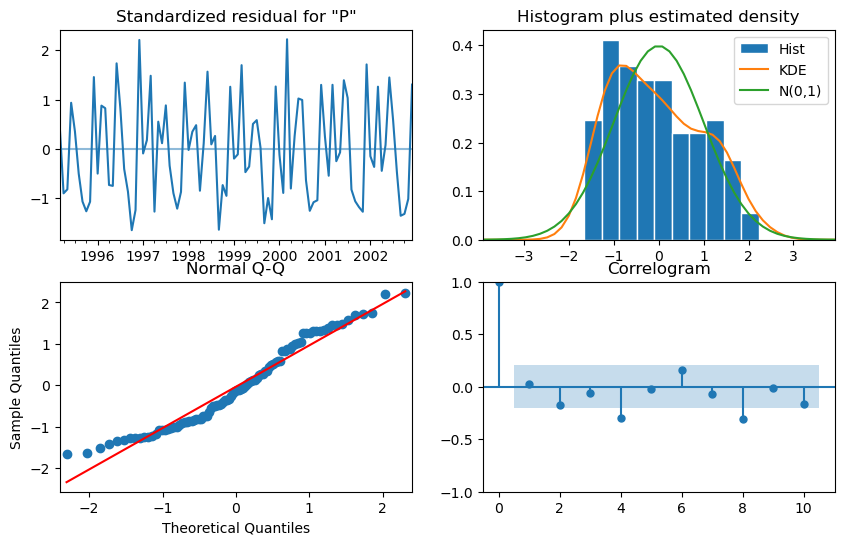

In [95]:
model.plot_diagnostics(figsize=(10,6))
plt.show()

In [154]:
y_pred=pd.Series(np.exp(model.forecast(20)[0]),index=df.Passengers[72:].index)

In [97]:
y_true=df.Passengers[72:]

In [98]:
arima_rmse=np.mean(y_true-y_pred)**2

# Moving average

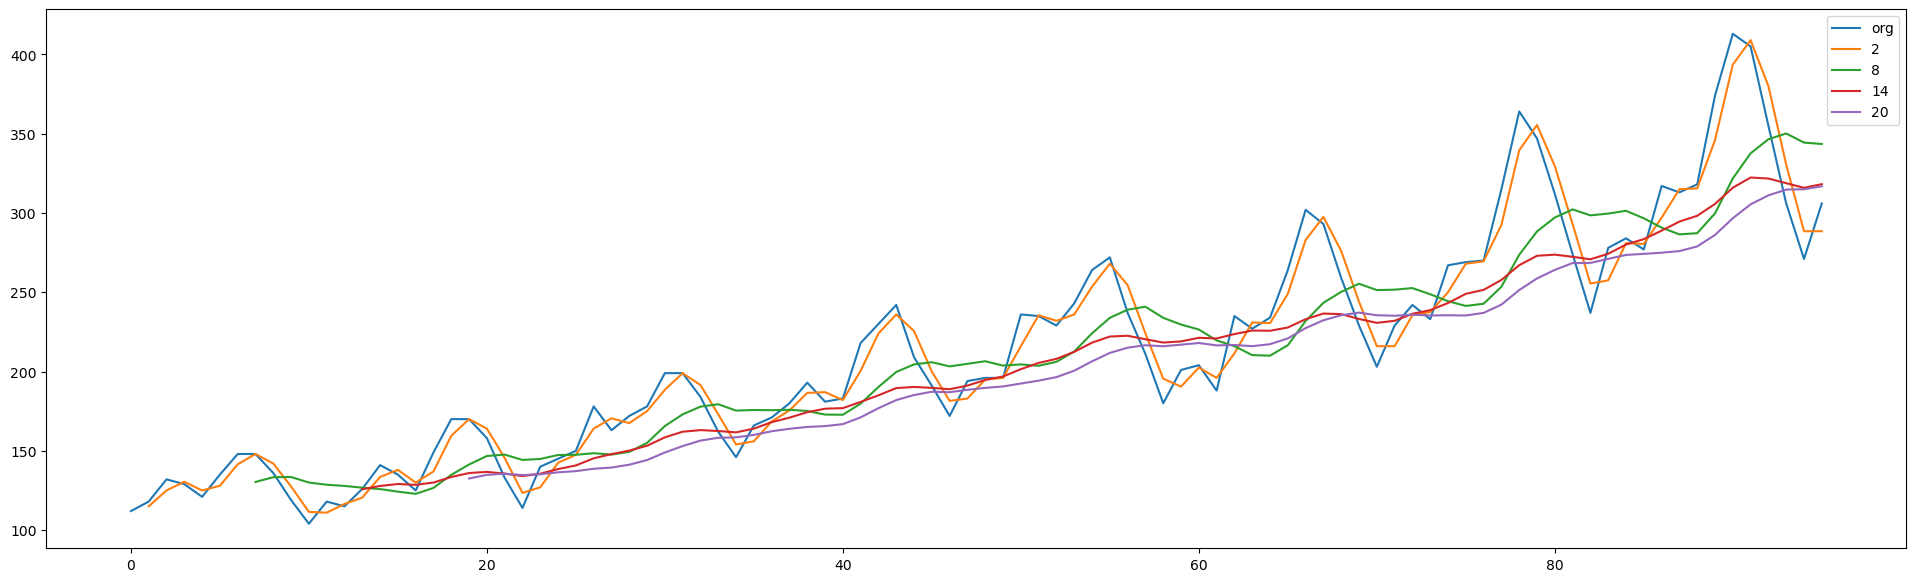

In [101]:
plt.figure(figsize=(24,7))
data.Passengers.plot(label='org')
for i in range(2,24,6):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Data driven methods

## from above plot we can see that as the window size increases the trend and seasonality is getting decreased

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
import statsmodels.graphics.tsaplots as tsa_plots

# Seasonal Decomposition

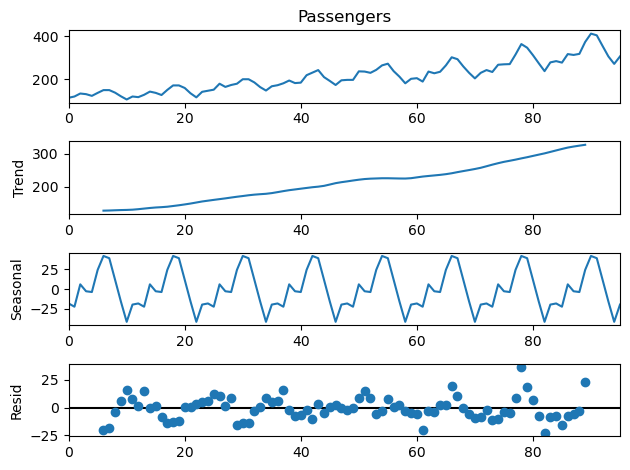

In [103]:
decompose_ts=seasonal_decompose(data.Passengers,period=12)
decompose_ts.plot()
plt.show()

# ACF AND PACF PLOTS

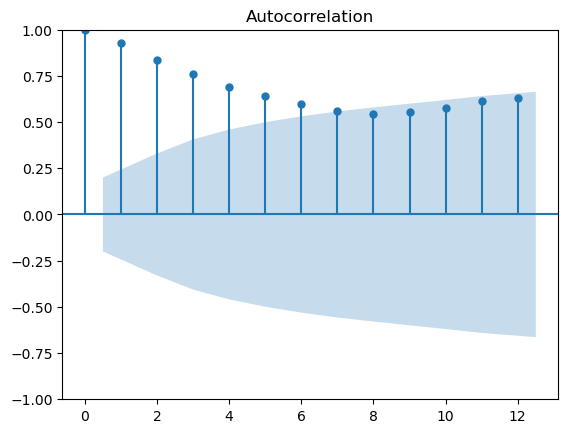

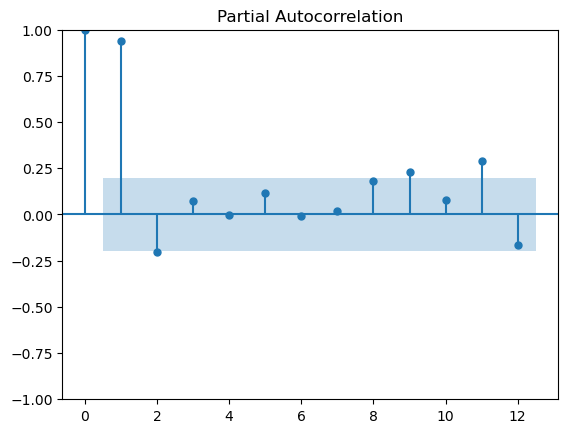

In [104]:
import statsmodels.graphics.tsaplots as tsaplots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

# Mean absolutes percentage error


In [106]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [107]:
weights=np.array([0.1, 0.2, 0.3, 0.4])

# Weighed moving average

In [109]:
dfw=pd.DataFrame()
dfw['Passengers']=data.Passengers
dfw['WA']=data['Passengers'].rolling(4).apply(lambda x:np.sum(weights*x))
dfw

,Passengers,WA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7


# Simple Exponential smoothing

In [125]:
ses_model=SimpleExpSmoothing(Train.Passengers).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

20.591879058613834

# Holt method

In [126]:
holt_model=Holt(Train.Passengers).fit(smoothing_level=0.2,smoothing_trend=0.2)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Passengers) 

15.765393202883873

# holt winters exponential smoothing additive seasonality and additive trend

In [112]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

12.084508619943344

# holt winters exponential smoothing multiplicative seasonality and additive trend

In [113]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

9.368354573562144

# Mean absolute error is less for holt winters exp smoothing multiplicative seasonality and additive trend

# Final Model by combining train and test

In [127]:
y_hat_hwm = Test.copy()
model = ExponentialSmoothing(np.array(Train['Passengers']), seasonal_periods=12, trend = 'add', seasonal= 'mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.624063801707963, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 122.19908190114779, 'initial_trend': 1.8112446129579398, 'initial_seasons': array([0.9085367 , 0.90555036, 1.04923612, 0.99934227, 0.98820696,
       1.08836607, 1.19343324, 1.19135796, 1.04956277, 0.92075548,
       0.80252351, 0.90357011]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


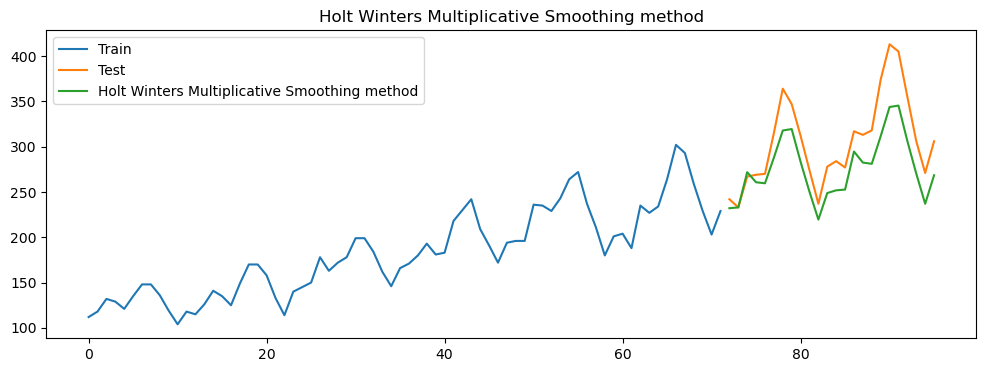

In [128]:
plt.figure(figsize = (12,4))
plt.plot(Train['Passengers'], label = 'Train')
plt.plot(Test['Passengers'], label = 'Test')
plt.plot(y_hat_hwm['hwm_forecast'], label ='Holt Winters Multiplicative Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Winters Multiplicative Smoothing method')
plt.show()